Avant tous nous allons importer les modules necessaire

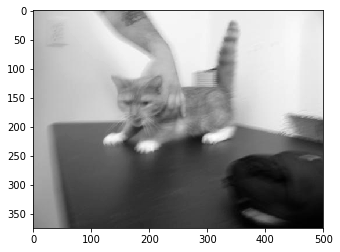

(375, 500)


In [2]:
import numpy as np #manipuler les arrays
import matplotlib.pyplot as plt #tracer et visualiser des données sous formes de graphiques
import os #manipuler les chemins
import cv2 #manipuler les images 
from tqdm import tqdm #pour monterer la progression dans une boucle 
DATADIR="C:\\Users\TRIUMPHAL\Downloads\kagglecatsanddogs_3367a\PetImages"

CATEGORIES = ["Cat", "Dog"]
#on vas convertir nos données en des données d'apprenstissage ( les préparer)
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # on aura DATADIR/Cat ou DATADIR/God
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array,cmap="gray")  # graph it''''''
        plt.show()  # visauliser !

        break  # on a besoin qu'unne seule image 
    break
print(img_array.shape)




Maintenant nous allons changer la taille des images elle est grande ! 

    

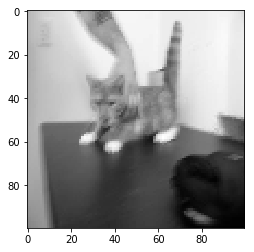

In [3]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))#redimentionner les images 
plt.imshow(new_array, cmap='gray')
plt.show()


Enfin  Creant maintenant les données d'apprentissage aprés avoir tester dans une seule image 
etapes : 
    pour chaque catégorie nous allons : lui donner un numéro 
        pour chaque image de la catégorie : 1-convertir l'image en tableau 
                                            2-la redimensionner en 100*100 
                                            3-ajouter l'image au tableau training data 




In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=cat 1=dog

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))
    

100%|██████████| 12501/12501 [01:35<00:00, 131.54it/s]


24946


Aprés avoir mis tous les chats puis chiens on a un problems le  réseau va s'abituier a prédire les chats puiis les chiens vu que Cat est 0 et Dog est 1 !
donc on va les mélanger allons y ! 




In [5]:
import random 

random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])


1
0
1
0
1
0
1
0
1
0


Let's go maintenant il est temps de construire le modele
X est la liste d'images 
Y est la liste qui correspond au labels 


In [6]:
X=[]
Y=[]

for image,label in training_data: 
    X.append(image)
    Y.append(label)
print(X[1].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
'''cette operation permet de convertir le X
en un numpy array puis le transformer 
en un tableau de -1 feature (nombre aléatoire)
et que chaque image a une taille de img_size*img_size 
et le 1 c 'est parce que on a mis GRAYSCALED'

'''




[[[[249]
   [248]
   [246]
   ..., 
   [239]
   [242]
   [242]]

  [[246]
   [228]
   [230]
   ..., 
   [205]
   [207]
   [240]]

  [[246]
   [228]
   [212]
   ..., 
   [180]
   [206]
   [239]]

  ..., 
  [[251]
   [244]
   [230]
   ..., 
   [242]
   [241]
   [244]]

  [[249]
   [245]
   [240]
   ..., 
   [246]
   [226]
   [247]]

  [[252]
   [250]
   [250]
   ..., 
   [251]
   [244]
   [252]]]]


"cette operation permet de convertir le X\nen un numpy array puis le transformer \nen un tableau de -1 feature (nombre aléatoire)\net que chaque image a une taille de img_size*img_size \net le 1 c 'est parce que on a mis GRAYSCALED'\n\n"

Maintenant nous allons enrengistrer les données pour ne pas refaire à chaque fois le mm code


In [7]:
import pickle

pickle_out = open("X.pickle","wb")#ouvrir X.pickle en ecriture 
pickle.dump(X, pickle_out)  #mettre X dans X.pickle
pickle_out.close() #fermer le pickle

pickle_out = open("Y.pickle","wb")#ouvrir Y.pickle en ecriture 
pickle.dump(Y, pickle_out)#copier  Y dans Y.pickle
pickle_out.close()#fermer le pickle 

''' ou bien de faire le suivant : 

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
y = pickle.load(pickle_in)'''


' ou bien de faire le suivant : \n\npickle_in = open("X.pickle","rb")\nX = pickle.load(pickle_in)\n\npickle_in = open("Y.pickle","rb")\ny = pickle.load(pickle_in)'

et maintenent on est pret à construire le CNN : Conventionel Neurone network 
commençons par 
la 1 ere couche de convolution : 
    qui transforme l'image en pixel puis 
    reduit l'image en des fenetre et met le maximum des pixels dans la fenetre reduite 
    Conv2D : 1 er parametre la dimmension des output 
             2eme paramétre la taille de la fenetre ici 3*3
             3 eme paramétre si c 'est la 1 ére couche en lui donne la taille de l'image RGB ici 100*100
             RGB donc on peut mettre input_shape=(100,100,3)
             on lui rajoute une fonction d'activation sur les outputs 
             qui est  relu : recfied liniair 

la 2 éme couche on un pooling max: 
la 3 éme couche est aussi une convolution 
la 4 éme est un pooling 
la dérniére est une couche dense classique input*weight+biases or il nous faut avanr une couche flatten pour rendre les outputs de la couche précédente en 1d

rrmarque : batch size c'est pour dire au lieu d'execter un par un on execute par exemple enre 20 et 200 
